# Lab 5

Mauricio Garcia 11/14/19

### Abstract

In this Lab, we go through a variety of different graphs and visualisations to see connection in car crash data. There are different values at play here, such as the use of alcohol, how drivers were or were not distracted and other non-crash related things such as insurance costs and such.

### Dataset Exploration

I'll import modules I may use in this lab below and open the tips file

In [77]:
# Here are all the modules i'll be using
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns  #IMPORTANT - UPGRADE SEABORN TO VERSION 0.9.0 IN ANACONDA ENV
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [78]:
# Here I open the file
df = sns.load_dataset('car_crashes')
df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [79]:
# Here I want to look at some overview of the document.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
total             51 non-null float64
speeding          51 non-null float64
alcohol           51 non-null float64
not_distracted    51 non-null float64
no_previous       51 non-null float64
ins_premium       51 non-null float64
ins_losses        51 non-null float64
abbrev            51 non-null object
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [80]:
# And let's look at a little description of more things inside this document
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


Looks like there is some good information here. No weird values in our average values or anything like that so this should work nicely for a data visualization.

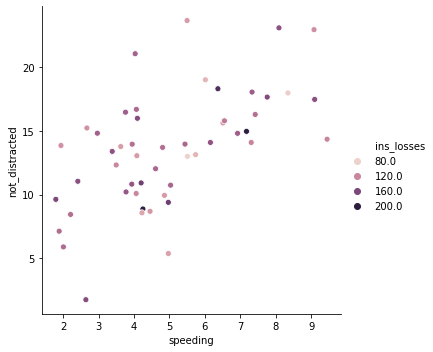

In [90]:
# Here's a simple graph to check how this all works
car_crashes = sns.load_dataset("car_crashes")
sns.relplot(x="speeding", y="not_distracted",hue="ins_losses",
            data=car_crashes, kind="scatter")

### Data Modeling and Analysis

Before any analysis, I want to make sure that the calcululations I perform match the data visualisations I run. I want to find the mean tip for now.

In [81]:
# Here I'm going to perform the mean calculation for the car crash data 
df.mean()

total              15.790196
speeding            4.998196
alcohol             4.886784
not_distracted     13.573176
no_previous        14.004882
ins_premium       886.957647
ins_losses        134.493137
dtype: float64

We have nice clean mean data, which should give us an idea of where the majority of points on our plot will be so I'll go ahead and run the visualisation.

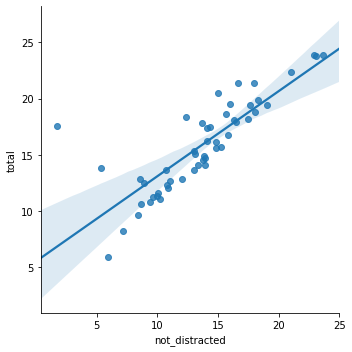

In [89]:
# Let's take a look at things like how distraction plays into speeding crashes.
sns.lmplot(x="not_distracted", y="total", data=tips);

There doesn't seem to be much of a logical correlation in this graph. However, it should not be misinterpreted as if more crashes = more distractions. I believe this graph is simply telling us that car crashes mean people who are also not distracted. It's not thata useful to know as it is rhetorical. Let's look at a violin plot with some different data points.

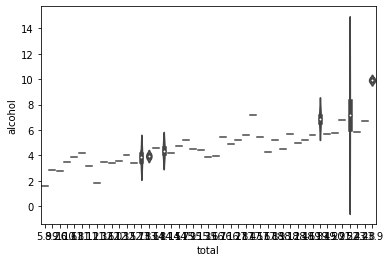

In [117]:
# I will be adding a violin plot below, comparing the total of crashes to alcohol.
car_crashes = sns.load_dataset("car_crashes")
sns.violinplot(x = "total", y = "alcohol",
data = car_crashes)

It looks like the more crashes, the more alcohol is used, which makes sense as both variables are likely directly proportional to each other. Let's look at a bar graph now.

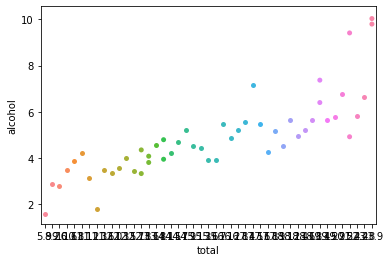

In [119]:
df = sns.load_dataset("car_crashes")
sns.swarmplot(x = "total", y = "alcohol",
data = car_crashes)

Once again, it looks like there seems to be the same type of observation from before

### Conclusions

Writing down and interpreting information from graphs can be a little harder than it seems. Comparing two aproppriatte variables is important so that when data is plotted, it is readable. I had some difficulty analyzing things thoroughly but this serves me well in terms of practice and knowledge for other analyses.

### Acknowledgment

I want to give a shout out to Ms. Sconyers and Navya for sharing code with me to create visualisations. Thank you guys!